In [1]:
%pip freeze

area==1.1.1
argovisHelpers==0.0.23
asttokens @ file:///opt/conda/conda-bld/asttokens_1646925590279/work
attrs==23.2.0
backcall @ file:///home/ktietz/src/ci/backcall_1611930011877/work
bokeh @ file:///croot/bokeh_1697490429057/work
Bottleneck @ file:///opt/conda/conda-bld/bottleneck_1657175564434/work
brotlipy==0.7.0
Cartopy @ file:///tmp/build/80754af9/cartopy_1636027031933/work
certifi @ file:///croot/certifi_1700501669400/work/certifi
cffi @ file:///opt/conda/conda-bld/cffi_1642701102775/work
cftime @ file:///croot/cftime_1678830372931/work
charset-normalizer @ file:///tmp/build/80754af9/charset-normalizer_1630003229654/work
click @ file:///croot/click_1698129812380/work
click-plugins==1.1.1
cligj==0.7.2
cloudpickle @ file:///croot/cloudpickle_1683040006038/work
comm @ file:///croot/comm_1671231121260/work
contourpy @ file:///opt/conda/conda-bld/contourpy_1663827406301/work
cryptography @ file:///croot/cryptography_1694444244250/work
cycler @ file:///tmp/build/80754af9/cycler_1637851

# Argo trajectories

Argovis indexes and serves a collection of estimated Argo parking-depth trajectories and velocities, originally from [https://journals.ametsoc.org/view/journals/atot/aop/JTECH-D-22-0065.1/JTECH-D-22-0065.1.xml](https://journals.ametsoc.org/view/journals/atot/aop/JTECH-D-22-0065.1/JTECH-D-22-0065.1.xml). In this notebook, we'll tour some basics of the dataset and API.

## Setup

In addition to importing a few python packages, make sure to plug in your Argovis API key for `API_KEY` in the next cell. If you don't have a free Argovis API key yet, get one at https://argovis-keygen.colorado.edu/.

In [2]:
%matplotlib inline
from argovisHelpers import helpers as avh
import helpers
    
API_KEY=''
API_PREFIX = 'https://argovis-api.colorado.edu/'

## Search and plot by region

Let's start by looking at Argo trajectory speeds and zonal and meridional velocities off the American East Coast in December 2020. The Argo trajectories API follows the same patterns for temporospatial and data filtering queries as other Argovis datasets:

In [3]:
polygon = [[-82,20],[-62,20],[-72,30],[-62,40],[-82,40],[-82,20]]
traj_param = {
    'startDate': '2020-12-01T00:00:00Z',
    'endDate': '2021-01-01T00:00:00Z',
    'polygon': polygon,
    'data': 'velocity_zonal,velocity_meridional,speed'
}

traj = avh.query('argotrajectories', options=traj_param, apikey=API_KEY, apiroot=API_PREFIX)

/books/dataset_sepecific_notebooks/helpers.py:74: UserWarning: color is redundantly defined by the 'color' keyword argument and the fmt string "-k" (-> color='k'). The keyword argument will take precedence.
  plt.plot(polygon_lon_lat(str(polygon))['lon'],polygon_lon_lat(str(polygon))['lat'],'-k',transform=ccrs.PlateCarree(), linewidth=polygonweight, color='red')
/usr/local/envs/argovis_demos/lib/python3.9/site-packages/cartopy/crs.py:245: ShapelyDeprecationWarning: __len__ for multi-part geometries is deprecated and will be removed in Shapely 2.0. Check the length of the `geoms` property instead to get the  number of parts of a multi-part geometry.
  if len(multi_line_string) > 1:
/usr/local/envs/argovis_demos/lib/python3.9/site-packages/cartopy/crs.py:297: ShapelyDeprecationWarning: Iteration over multi-part geometries is deprecated and will be removed in Shapely 2.0. Use the `geoms` property to access the constituent parts of a multi-part geometry.
  for line in multi_line_string:
/u

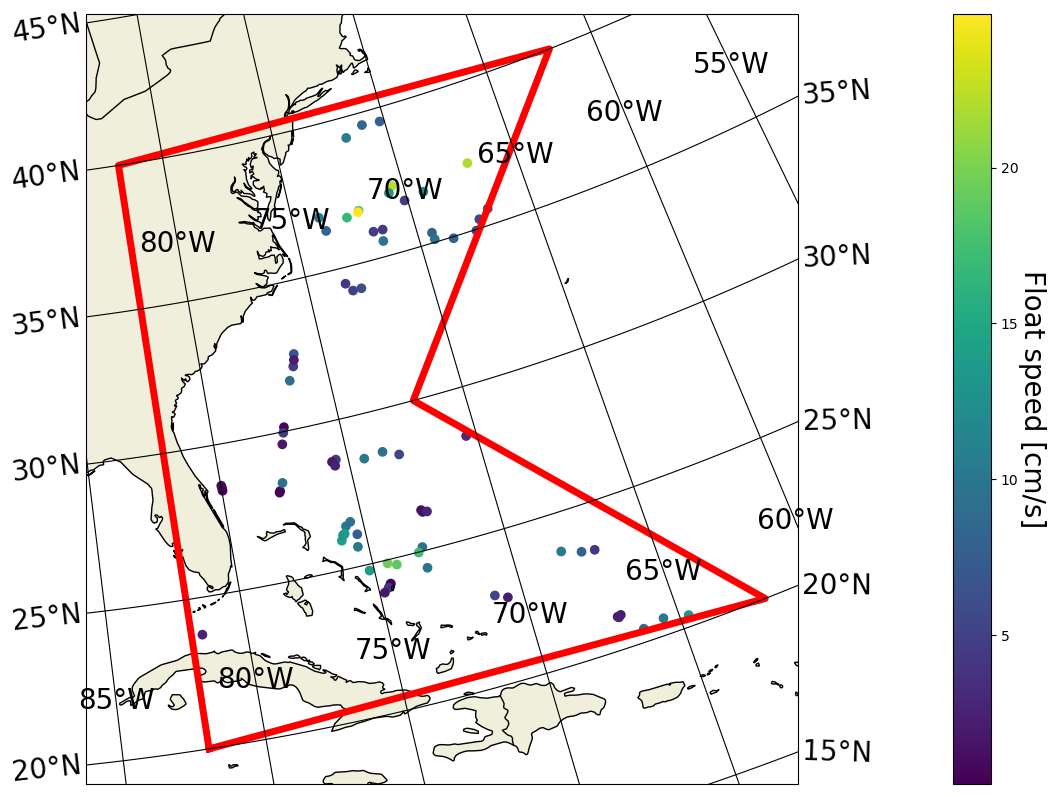

In [4]:
traj_lon = [x['geolocation']['coordinates'][0] for x in traj]
traj_lat = [x['geolocation']['coordinates'][1] for x in traj]
traj_speed = [x['data'][x['data_info'][0].index('speed')][0] for x in traj]
helpers.simple_map(traj_lon, traj_lat, z=traj_speed, polygon=polygon, zlabel='Float speed [cm/s]')

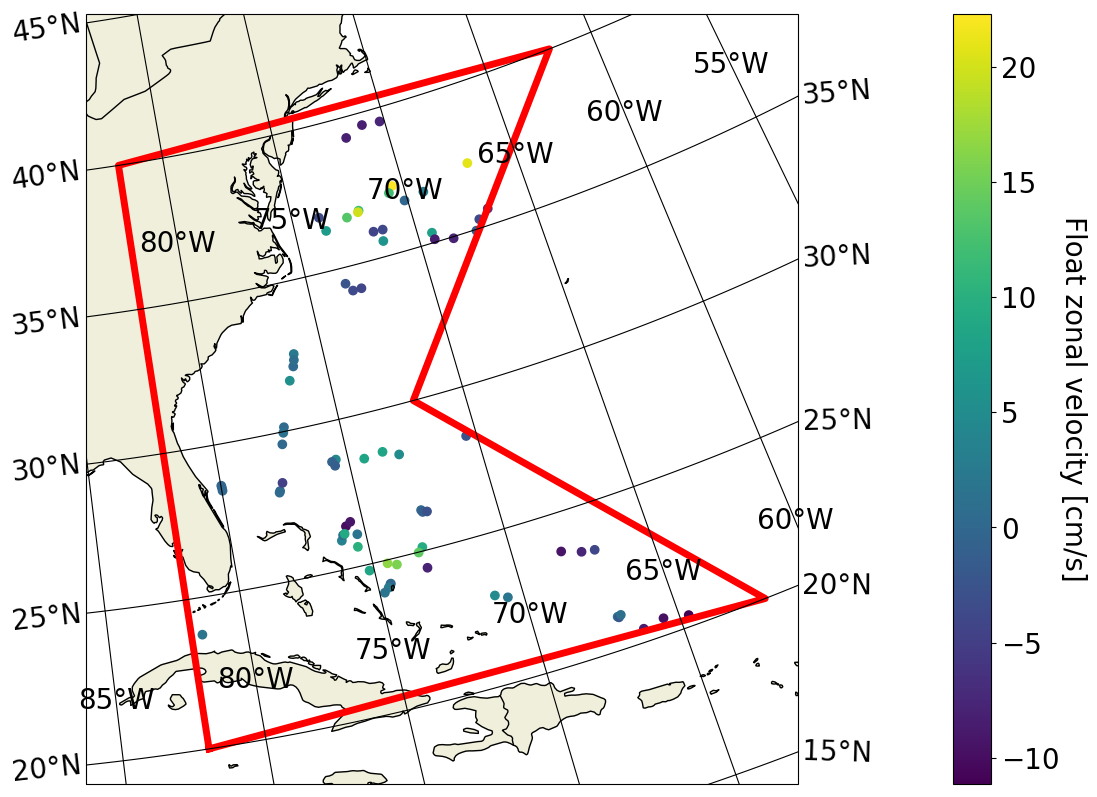

In [5]:
traj_zonal = [x['data'][x['data_info'][0].index('velocity_zonal')][0] for x in traj]
helpers.simple_map(traj_lon, traj_lat, z=traj_zonal, polygon=polygon, zlabel='Float zonal velocity [cm/s]')

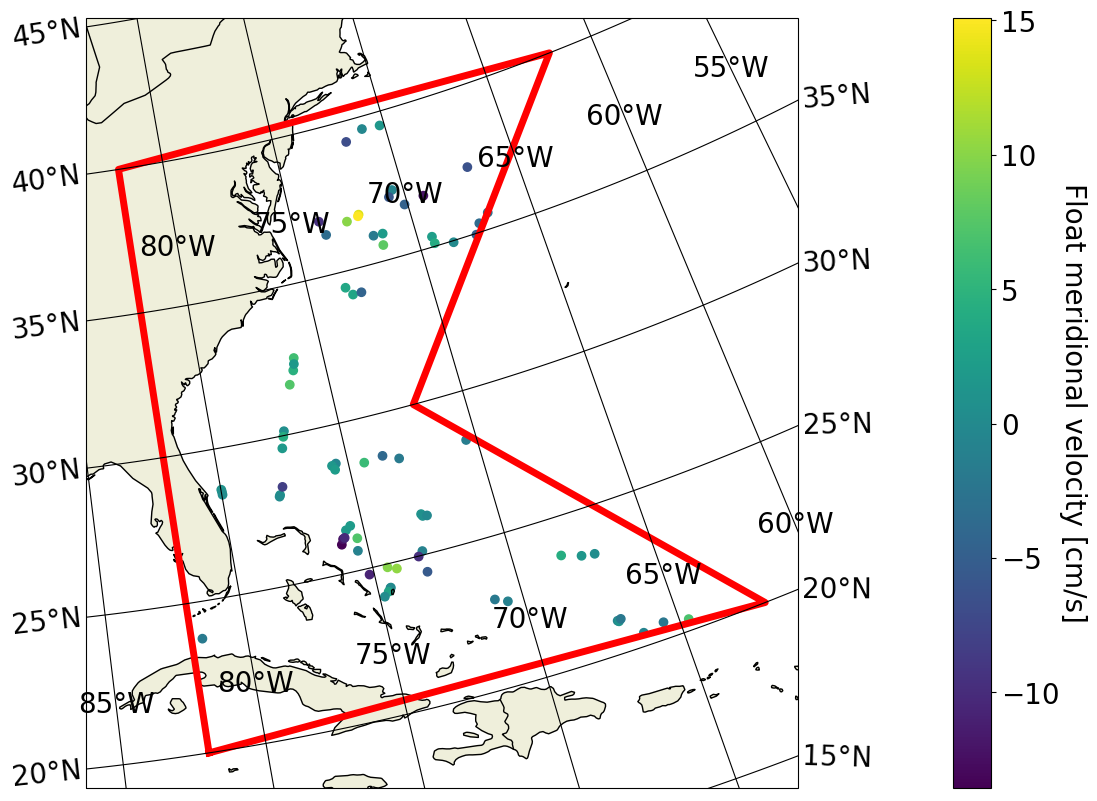

In [6]:
traj_meridional = [x['data'][x['data_info'][0].index('velocity_meridional')][0] for x in traj]
helpers.simple_map(traj_lon, traj_lat, z=traj_meridional, polygon=polygon, zlabel='Float meridional velocity [cm/s]')